## Introduction ot Regression with Neural Networks in TensorFlow

There are many defination for a regression problme but in ur case,

**we're going to simplify it:**

  predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

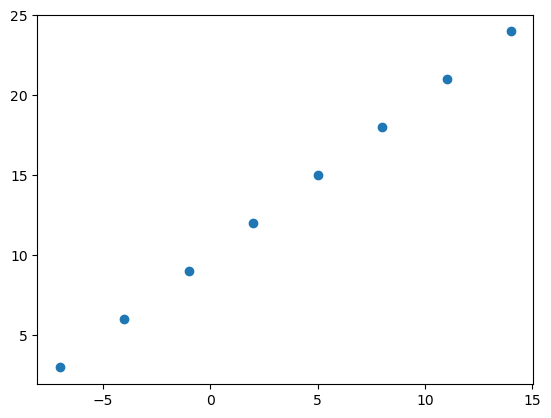

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# create feature

X=np.array([-7,-4,-1,2,5,8,11,14])

# create label
y=np.array([3,6,9,12,15,18,21,24])

# visualize it
plt.scatter(X,y)


# Input and Output

In [2]:

housing_info=tf.constant(["breedroom","bathroom","garage"])

housing_price=tf.constant([93400])



In [3]:
# Turn x and y to Tensor

X=tf.constant(X,dtype=tf.float32)
y=tf.constant(y,dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# steps in Modelling with Tenserflow 🏛️

1. createa a model - define the input and output layers, as well as the hidden layers of a deep learning model.

2. compile a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).

3. fitting a model - letting the model try to find patterns between X & y (features and labels).

4. evaluate a model - how well the model is doing.

In [4]:
# set random seed

tf.random.set_seed(42)

# 1. create a model using sequential API

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1) # one hidden Layer
])

# 2. compile the model
model.compile(optimizer=tf.keras.optimizers.legacy.SGD(),
              loss=tf.keras.losses.mae, # mean absolute error,
              metrics=["mae"]
              )

# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5) # <- updated to expand dims

Epoch 1/5


2023-07-10 08:29:44.482197: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 285ms/step - loss: 10.6185 - mae: 10.6185
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 10.4860 - mae: 10.4860
Epoch 3/5
1/1 [==============================] - 0s 6ms/step - loss: 10.3535 - mae: 10.3535
Epoch 4/5
1/1 [==============================] - 0s 6ms/step - loss: 10.2210 - mae: 10.2210
Epoch 5/5
1/1 [==============================] - 0s 6ms/step - loss: 10.0885 - mae: 10.0885


In [5]:
# check out X and y

X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
# Try to make prediction

model.predict([20])


1/1 [==============================] - 0s 62ms/step


array([[20.015682]], dtype=float32)

## Improving the Model

we can improve  our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.

2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.

3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [7]:
# lets rebuild the model

# 1. create the model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.legacy.SGD(),
    metrics=["mae"]
)

# 3. Fit the model (longer Time)

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100) # <- updated to expand dims


Epoch 1/100
1/1 [==============================] - 0s 126ms/step - loss: 10.6239 - mae: 10.6239
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4914 - mae: 10.4914
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.3589 - mae: 10.3589
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2264 - mae: 10.2264
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 10.0939 - mae: 10.0939
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 9.9614 - mae: 9.9614
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 9.8289 - mae: 9.8289
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.6964 - mae: 9.6964
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 9.5639 - mae: 9.5639
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4314 - mae: 9.4314
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - l

In [8]:
model.predict([17])

1/1 [==============================] - 0s 48ms/step


array([[29.657356]], dtype=float32)

In [9]:
# Recreate model 2 with extra 100 layers

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)

model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)



Epoch 1/100


/Users/magesh/anaconda3/lib/python3.10/site-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


1/1 [==============================] - 0s 244ms/step - loss: 14.6910 - mae: 14.6910
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.9054 - mae: 13.9054
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 13.1142 - mae: 13.1142
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.3163 - mae: 12.3163
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5111 - mae: 11.5111
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6972 - mae: 10.6972
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 9.8731 - mae: 9.8731
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 9.0368 - mae: 9.0368
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 8.1864 - mae: 8.1864
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3201 - mae: 7.3201
Epoch 11/100
1/1 [==============================] - 0s 6ms/step - loss: 6.574

In [10]:
model.predict([17])

1/1 [==============================] - 0s 51ms/step


array([[26.917425]], dtype=float32)

# Evalting a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

when it comes to evaluation there are 3 words you should memorize:

>  "Visualize, visualize, visualize"

it's a good idea to visualize:

* The data - what data are we working with? what does it look like?


* The model itself - what does our model look like?


* The training of a model - how does a model perform while it learns?

* The Predictions of the model- how do the predictions of a model line up against the ground truth (the original labels)?

Let's see some examples.

In [11]:
# make a bigger dataset
X=tf.range(-100,100,4)
# Make labels for the dataset
y=X+10 # this the formulat that our model should learnl



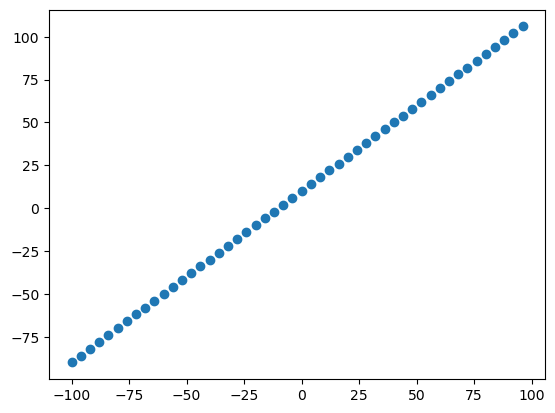

In [12]:
# visualize
import matplotlib.pyplot as plt

plt.scatter(X,y)

the 3 sets are:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.

* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.

* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available and is only used once a model is completely trained (the model has never "seen" the data in the test set).


In [72]:
# split the dataset
# 80% training and 20% for testing

train=int(len(X) *0.75) # 75%
valid=train+int(len(X)*0.15) # 15 %

print(train,valid, )
x_train,y_train=X[0:train],y[:train]
# x_valid,y_valid=X[train:valid],y[train:valid]
x_test,y_test=X[train:],y[train:]

# len(x_train),len(x_test)
train

37 44


37

### Visualzing the data

Now we've got our data in training and test sets...let's visualize it again


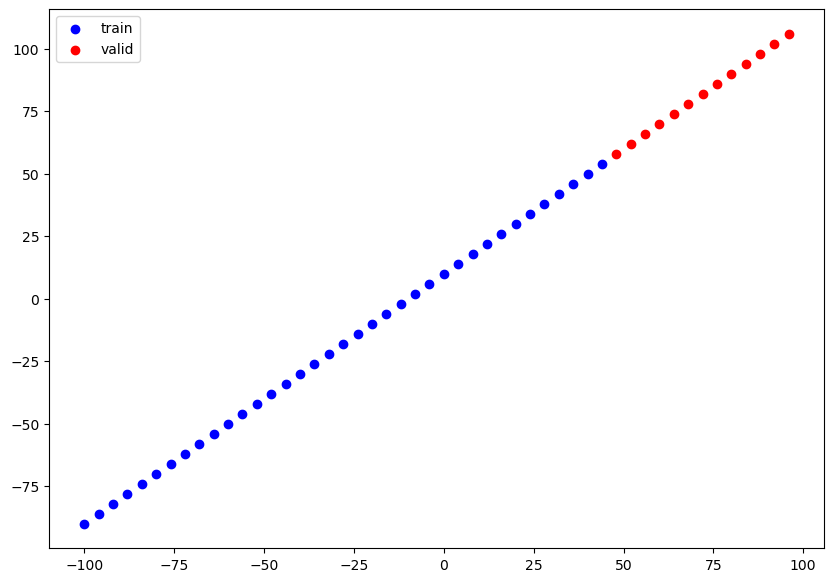

In [73]:
plt.figure(figsize=(10,7))

# plot train
plt.scatter(x_train,y_train,c="b",label="Traning data")

# plt.scatter(x_valid,y_valid,c="y",label="valid data")

plt.scatter(x_test,y_test,c="r",label="valid data")

plt.legend(["train","valid","test"])

In [74]:
# let build


# 1. create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. compile

model.compile(
    optimizer=tf.keras.optimizers.legacy.SGD(),
    loss=tf.keras.losses.mae,
    metrics=["mae"]
)

# 3. Fit the model
# model.fit(tf.expand_dims(x_train,axis=-1),y_train,epochs=100)

In [108]:
# lets create the model which build automatically  by defining the input_shape

# 1. creat a model

model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(lr=0.01),
    metrics=["mae"]

)




In [109]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

* Total params - total number of parameters in the model.

* Trainable parameters - these are the parameters (patterns) the model can update as it trains.

* Non-trainable parameters - these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).

In [ ]:
tf.expand_dims(x_train,axis=-1),y_train

In [110]:
model.fit( tf.expand_dims(x_train,axis=-1),y_train,epochs=100,verbose=2)

Epoch 1/100
2/2 - 0s - loss: 35.1353 - mae: 35.1353 - 398ms/epoch - 199ms/step
Epoch 2/100
2/2 - 0s - loss: 22.1644 - mae: 22.1644 - 11ms/epoch - 6ms/step
Epoch 3/100
2/2 - 0s - loss: 9.9897 - mae: 9.9897 - 15ms/epoch - 7ms/step
Epoch 4/100
2/2 - 0s - loss: 12.2750 - mae: 12.2750 - 11ms/epoch - 6ms/step
Epoch 5/100
2/2 - 0s - loss: 15.5620 - mae: 15.5620 - 13ms/epoch - 7ms/step
Epoch 6/100
2/2 - 0s - loss: 15.3009 - mae: 15.3009 - 13ms/epoch - 7ms/step
Epoch 7/100
2/2 - 0s - loss: 12.9776 - mae: 12.9776 - 10ms/epoch - 5ms/step
Epoch 8/100
2/2 - 0s - loss: 9.2808 - mae: 9.2808 - 10ms/epoch - 5ms/step
Epoch 9/100
2/2 - 0s - loss: 7.3085 - mae: 7.3085 - 11ms/epoch - 6ms/step
Epoch 10/100
2/2 - 0s - loss: 10.1509 - mae: 10.1509 - 11ms/epoch - 6ms/step
Epoch 11/100
2/2 - 0s - loss: 10.6674 - mae: 10.6674 - 11ms/epoch - 6ms/step
Epoch 12/100
2/2 - 0s - loss: 9.1662 - mae: 9.1662 - 11ms/epoch - 5ms/step
Epoch 13/100
2/2 - 0s - loss: 6.8819 - mae: 6.8819 - 11ms/epoch - 5ms/step
Epoch 14/100
2/

In [111]:
model.predict(x_test)

1/1 [==============================] - 0s 37ms/step


array([[ 58.144615],
       [ 62.17847 ],
       [ 66.21232 ],
       [ 70.246185],
       [ 74.28003 ],
       [ 78.31388 ],
       [ 82.34773 ],
       [ 86.38159 ],
       [ 90.41545 ],
       [ 94.4493  ],
       [ 98.48315 ],
       [102.517   ],
       [106.550865]], dtype=float32)

In [92]:
y_test

<tf.Tensor: shape=(13,), dtype=int32, numpy=
array([ 58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106],
      dtype=int32)>

In [81]:
from tensorflow.keras.utils import plot_model

plot_model(model,show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


## Visualizing our model's predictions

To visualize predictions,its  a good idea to plot them against the ground truth labels.

Often you'll see this in the form of y_test vs. y_pred (ground truth vs. predictions).


In [112]:
# make some predictions

y_preds=model.predict(x_test)
y_preds

1/1 [==============================] - 0s 20ms/step


array([[ 58.144615],
       [ 62.17847 ],
       [ 66.21232 ],
       [ 70.246185],
       [ 74.28003 ],
       [ 78.31388 ],
       [ 82.34773 ],
       [ 86.38159 ],
       [ 90.41545 ],
       [ 94.4493  ],
       [ 98.48315 ],
       [102.517   ],
       [106.550865]], dtype=float32)

In [113]:
# Create a plot function to visualize y_preds and y_train

def plot_prediction(y_preds,train_data=x_train,train_label=y_train,test_data=x_test,test_label=y_test):
    plt.figure(figsize=(10,7))
    # plot train data
    plt.scatter(train_data,train_label,c="b",label="train data")
    # plot test data
    plt.scatter(test_data,test_label,c="g",label="train data")
    # plot model prediction vs actual
    plt.scatter(test_data,y_preds,c="r",label="predict data")

    plt.legend()

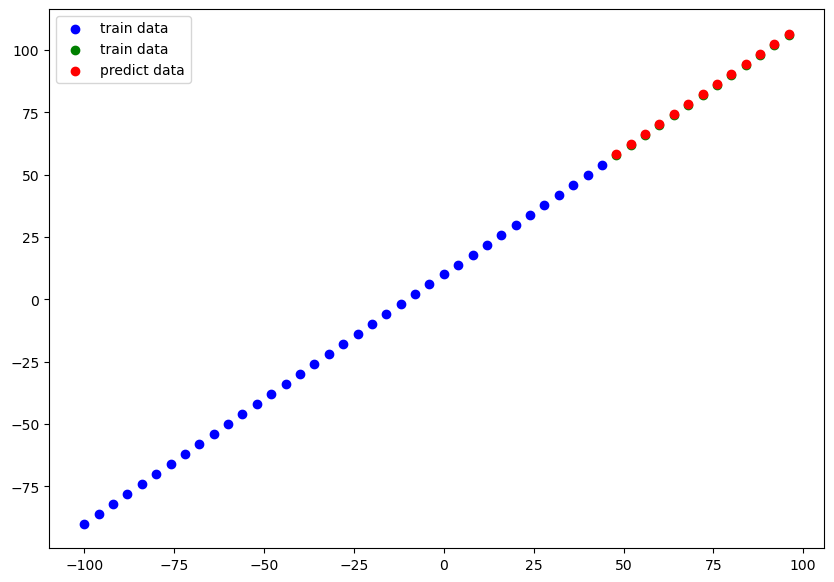

In [114]:
plot_prediction(y_preds=y_preds)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* **MAE** - mean absolute error, "on average, how wrong is each of my model's predictions"

* **MSE** - mean square error, "square the average errors"



In [119]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 88ms/step - loss: 0.3477 - mae: 0.3477


[0.34773752093315125, 0.34773752093315125]

In [125]:
# want to squeez the y_pres so that our test and y_prdes are in same shape
tf.metrics.mean_absolute_error(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=0.34773755>

In [126]:
# Mean square erroe

tf.metrics.MSE(y_test,tf.squeeze(y_preds))

<tf.Tensor: shape=(), dtype=float32, numpy=0.13696635>